In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv('/content/netflix_dataset.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",19-Oct-20,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,25-Sep-20,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,31-Oct-20,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States",1-Mar-20,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [4]:
df.shape

(7787, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


# **Check for Missing Values**

<Axes: >

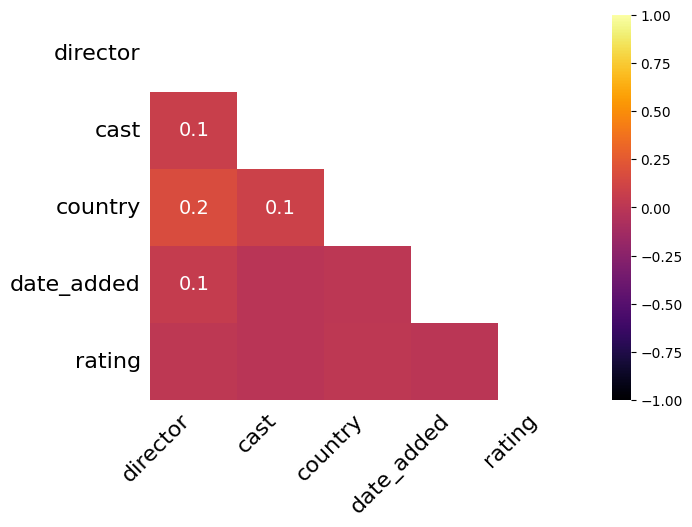

In [8]:
msno.heatmap(df,cmap="inferno",figsize=(7,5))

# **Distribution of Type (Movies vs TV Shows)**

<ipython-input-9-045a66d4af55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=netflix_colors)


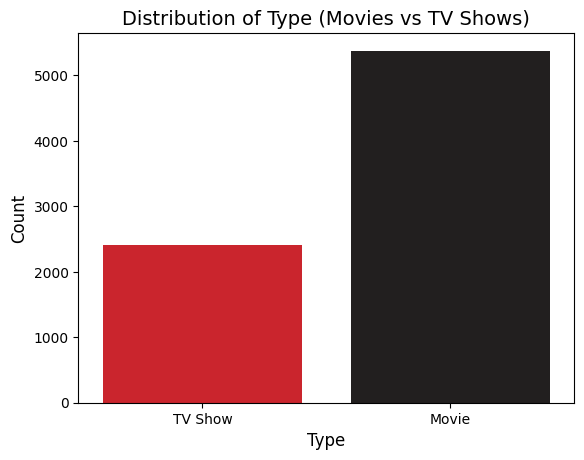

In [9]:
netflix_colors = ['#221F1F', '#E50914']
sns.countplot(x='type', data=df, palette=netflix_colors)
plt.title('Distribution of Type (Movies vs TV Shows)', fontsize=14)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

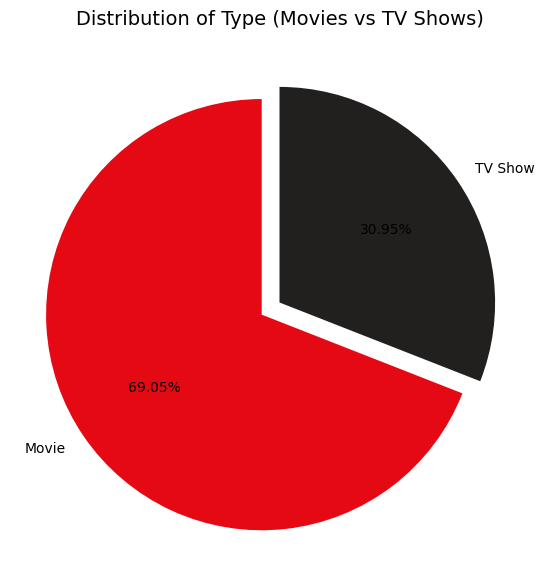

In [10]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%',
        startangle=90, colors=['#E50914', '#221F1F'], explode=(0.1, 0))
plt.title('Distribution of Type (Movies vs TV Shows)', fontsize=14)
plt.show()

# **Content Distribution by Country and Type (Movies vs TV Shows)**

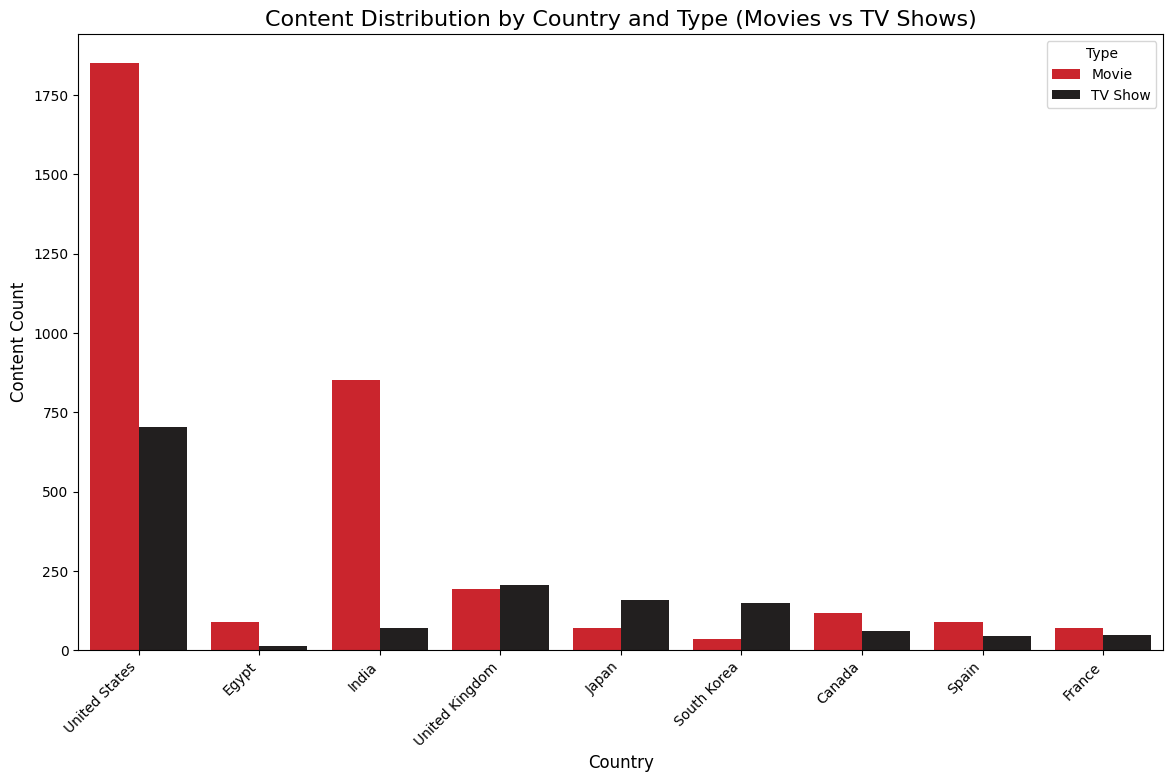

In [11]:
top_countries = df['country'].value_counts(dropna=False).head(10).index
filtered_df = df[df['country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.countplot(x='country', hue='type', data=filtered_df, palette=['#E50914', '#221F1F'])

plt.xticks(rotation=45, ha='right')
plt.title('Content Distribution by Country and Type (Movies vs TV Shows)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.legend(title='Type', loc='upper right', fontsize=10)
plt.show()

# **Number of Titles Added by Year**

<ipython-input-12-e8c88d0f5542>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


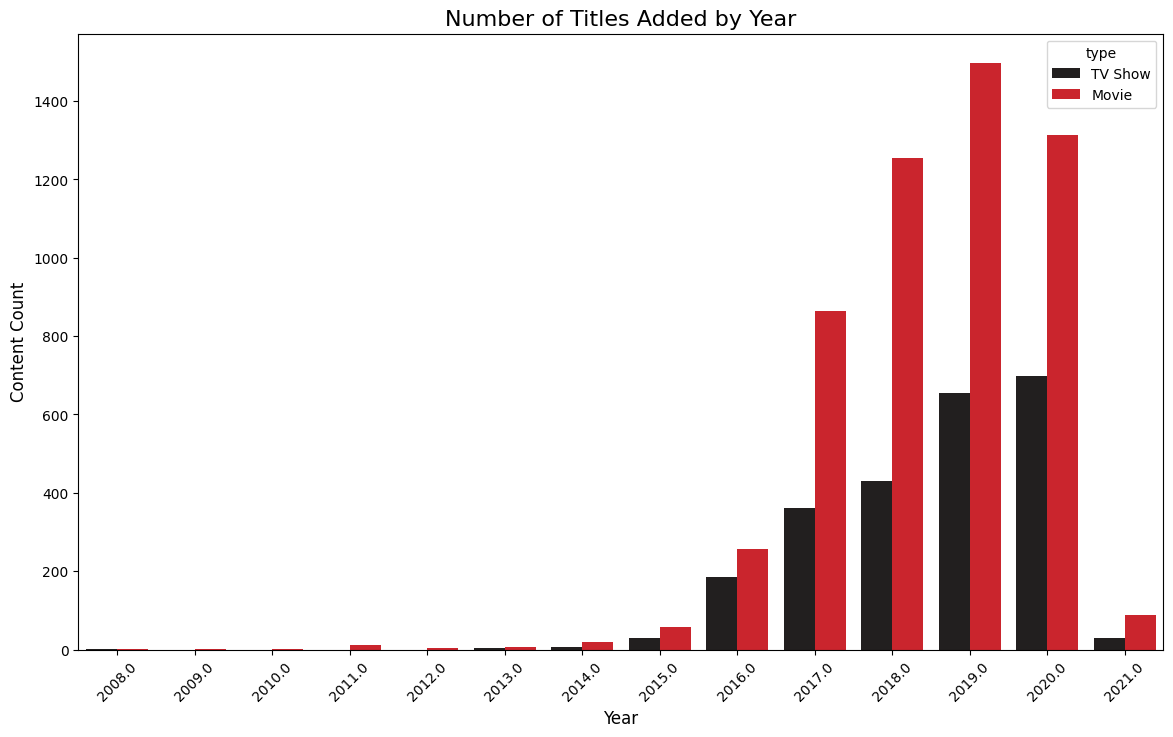

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(14, 8))
sns.countplot(x='year_added', data=df,hue='type', palette=['#221F1F', '#E50914'], order=sorted(df['year_added'].dropna().unique()))

plt.title('Number of Titles Added by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# **Distribution of Ratings**

<ipython-input-13-26da133d327c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette=netflix_palette, order=df['rating'].value_counts().index)
<ipython-input-13-26da133d327c>:3: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='rating', data=df, palette=netflix_palette, order=df['rating'].value_counts().index)


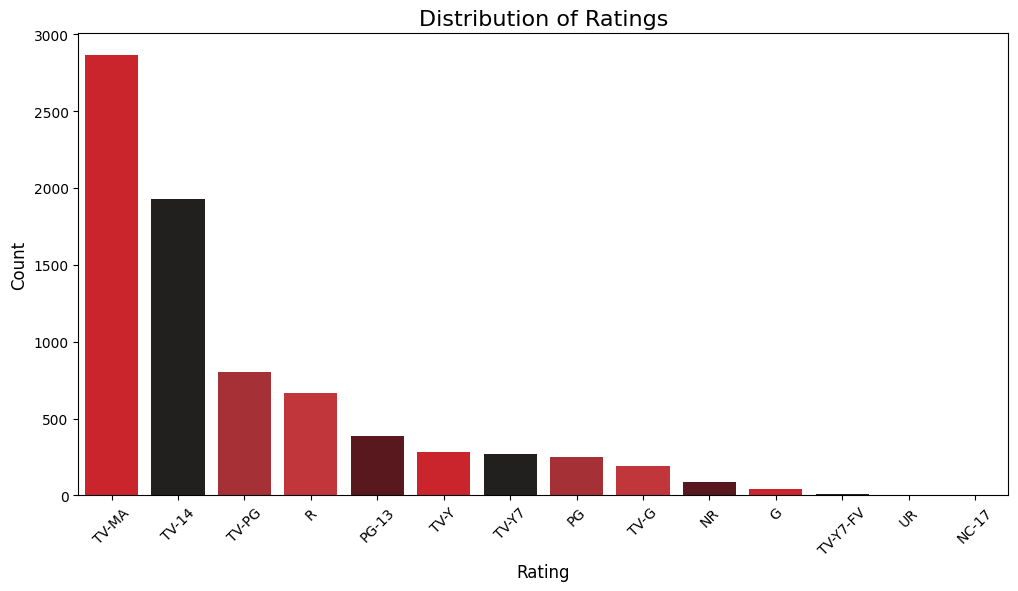

In [13]:
netflix_palette =['#E50914', '#221F1F', '#B81D24', '#D81F26', '#640D14']
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df, palette=netflix_palette, order=df['rating'].value_counts().index)

plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# **Monthly Content Addition on Netflix (Aggregated Across All Years)**

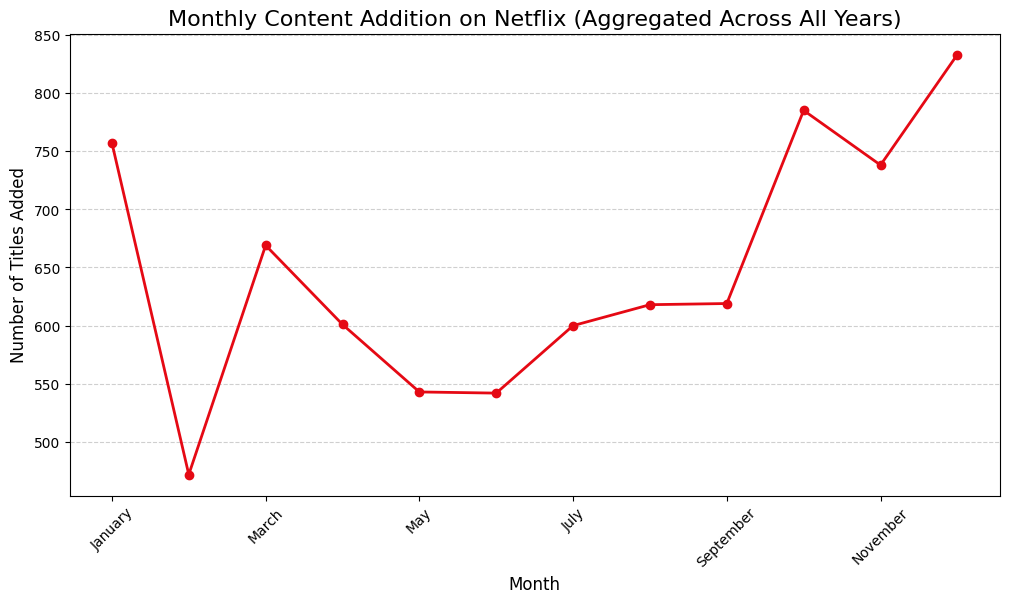

In [14]:
df['month_name'] = df['date_added'].dt.month_name()

monthly_trend = df['month_name'].value_counts()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend = monthly_trend.reindex(month_order)
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='#E50914', linewidth=2)

plt.title('Monthly Content Addition on Netflix (Aggregated Across All Years)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


The graph shows the monthly content addition on Netflix, aggregated across all years. The data exhibits significant fluctuations, with peaks in January, March, and September, and lower values in the middle of the year. The highest point is around 800 titles added in a single month

# **Distribution of Number of Seasons in TV Shows**

In [15]:
import re
# Function to extract the number of seasons from the 'duration' column
def extract_seasons_from_duration(duration):
    if isinstance(duration, str):
        match = re.search(r'(\d+)\s+Season', duration, re.IGNORECASE)
        if match:
            return int(match.group(1))
    return None

# Apply the function to the 'duration' column to create a new 'seasons' column
df['seasons'] = df['duration'].apply(extract_seasons_from_duration)

# Filter out only the TV Shows
tv_shows = df[df['type'] == 'TV Show']
tv_shows[['title', 'duration', 'seasons']].head()


,title,duration,seasons
0,3%,4 Seasons,4.0
5,46,1 Season,1.0
11,1983,1 Season,1.0
12,1994,1 Season,1.0
16,9-Feb,1 Season,1.0


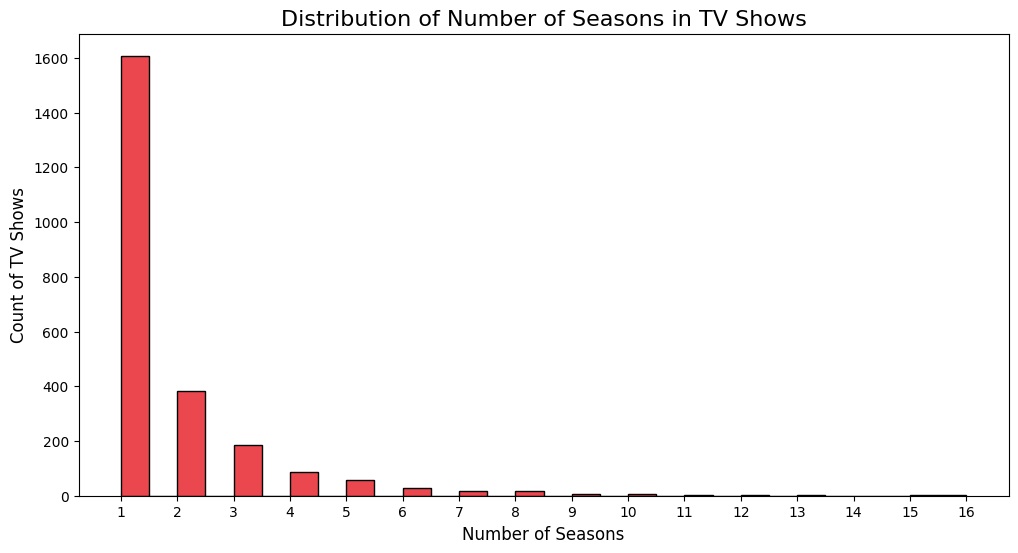

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(tv_shows['seasons'], bins=30, kde=False, color='#E50914')

plt.xticks(range(1, int(tv_shows['seasons'].max()) + 1))
plt.title('Distribution of Number of Seasons in TV Shows', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Count of TV Shows', fontsize=12)

plt.show()


# **Top 10 Popular Genres on Netflix**

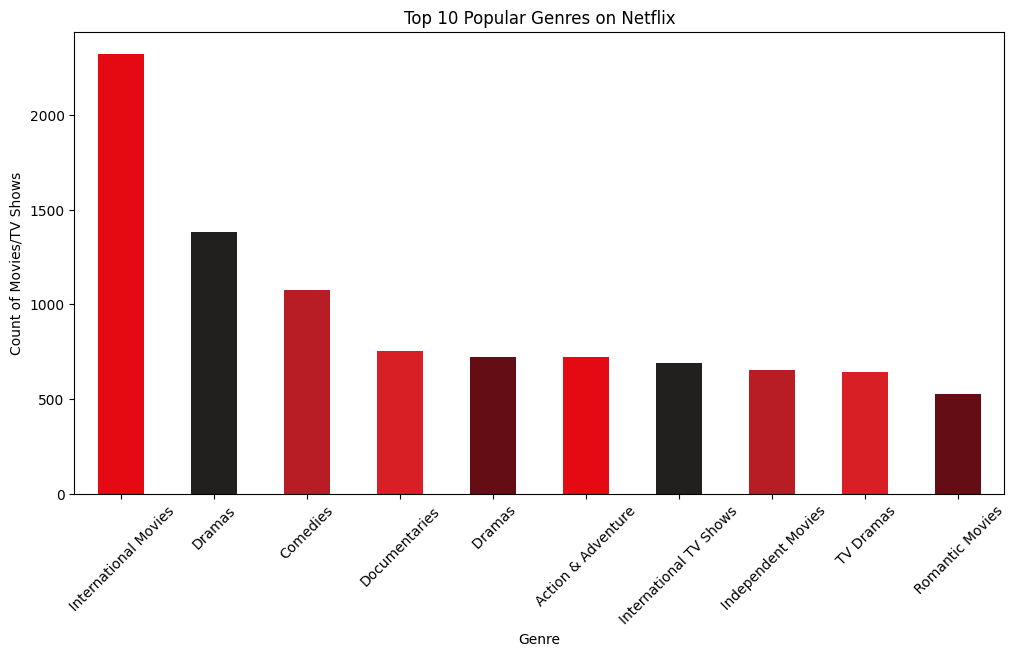

In [17]:
genre_count = df['listed_in'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
genre_count.plot(kind='bar', color=netflix_palette)
plt.title('Top 10 Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count of Movies/TV Shows')
plt.xticks(rotation=45)
plt.show()


# **Top 10 Directors on Netflix**

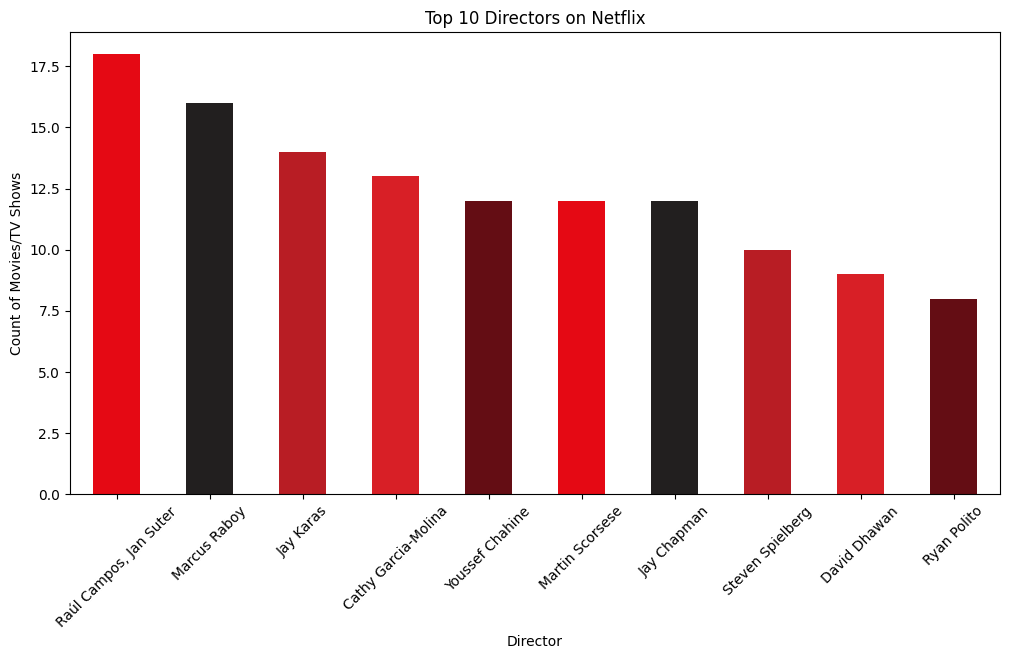

In [18]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color=netflix_palette)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Count of Movies/TV Shows')
plt.xticks(rotation=45)
plt.show()


# **Top 10 Most Popular Actors on Netflix**

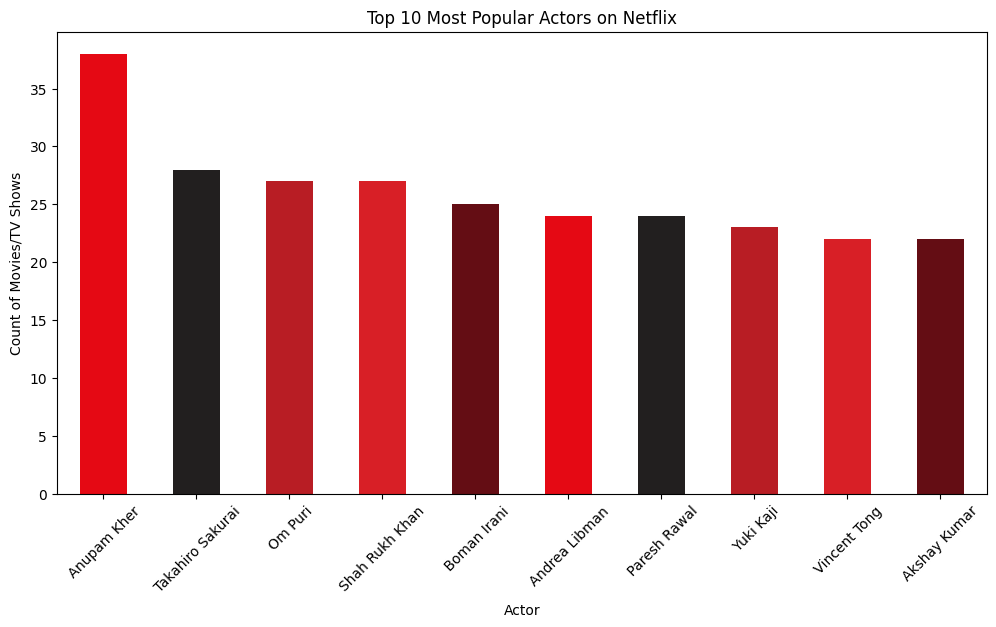

In [19]:
cast_count = df['cast'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
cast_count.plot(kind='bar', color=netflix_palette)
plt.title('Top 10 Most Popular Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Count of Movies/TV Shows')
plt.xticks(rotation=45)
plt.show()

# **Movie with the Maximum Duration**

In [20]:
# Extract the content with the maximum duration

df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
max_duration_idx = df['duration'].idxmax()
max_duration_title = df.loc[max_duration_idx, 'title']
max_duration_value = df.loc[max_duration_idx, 'duration']

print(f"The content with the maximum duration is '{max_duration_title}' with a duration of {max_duration_value} minutes.")


The content with the maximum duration is 'Black Mirror: Bandersnatch' with a duration of 312.0 minutes.


# **The TV Show with the Highest Number of Seasons**

In [21]:
# Extract the TV show with the most seasons

tv_shows = df[df['type'] == 'TV Show']
tv_shows['duration'] = tv_shows['duration'].fillna('').astype(str)
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
max_seasons_idx = tv_shows['seasons'].idxmax()
max_seasons_title = tv_shows.loc[max_seasons_idx, 'title']
max_seasons_value = tv_shows.loc[max_seasons_idx, 'seasons']

print(f"The TV show with the most seasons is '{max_seasons_title}' with {max_seasons_value} seasons.")


The TV show with the most seasons is 'Grey's Anatomy' with 16.0 seasons.


<ipython-input-21-ffc3df05d1f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].fillna('').astype(str)
<ipython-input-21-ffc3df05d1f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


# **Country with Most TV Shows**

In [22]:
most_tv_shows_country, most_tv_shows_count = df[df['type'] == 'TV Show']['country'].value_counts().idxmax(), df[df['type'] == 'TV Show']['country'].value_counts().max()

print(f"The country with the most TV shows is '{most_tv_shows_country}' with {most_tv_shows_count} TV shows.")


The country with the most TV shows is 'United States' with 705 TV shows.


# **Content Rating Analysis**

In [23]:
tv_14_india=df[(df['rating'] == 'TV-14') & (df['country'] == 'India') & (df['type'] == 'Movie')]
len(tv_14_inidia)

497

# **Content Added by Year: India (2000-2021)**

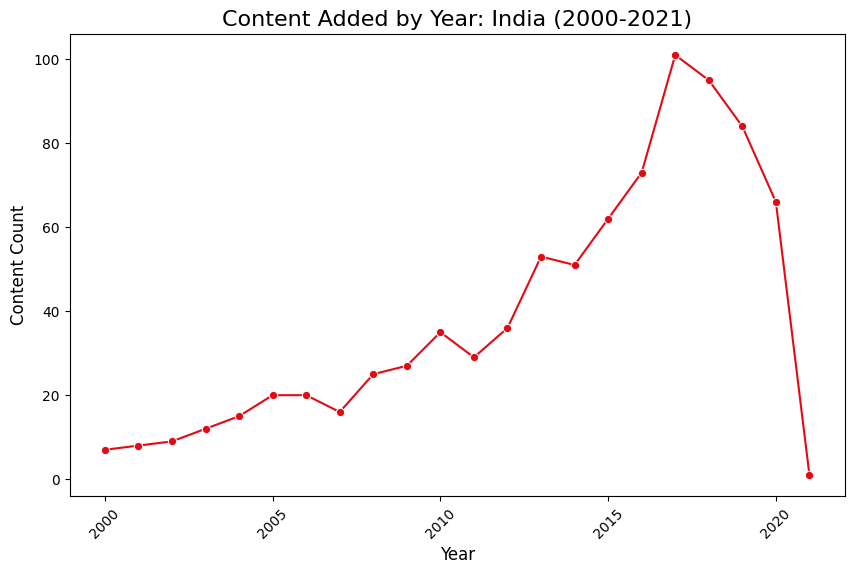

In [30]:
india_data = df[(df['country'] == 'India') & (df['release_year'] >= 2000) & (df['release_year'] <= 2021)]


content_by_year = india_data.groupby('release_year').size().reset_index(name='content_count')


plt.figure(figsize=(10, 6))
sns.lineplot(data=content_by_year, x='release_year', y='content_count', marker='o', color="#E50914")

plt.title('Content Added by Year: India (2000-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


The graph shows the content added by year for India from 2000 to 2021. The trend line indicates that content added in India steadily increased over the years, with a sharp rise around 2014-2016 followed by a steep decline in 2020

# **Content Added by Year: USA vs India (2010-2021)**

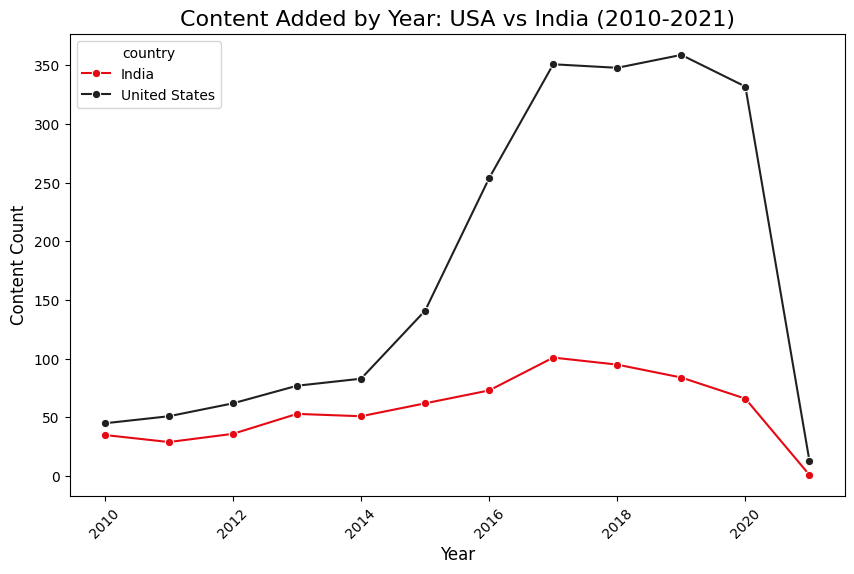

In [26]:
usa_india_data = df[(df['country'].isin(['United States', 'India'])) & (df['release_year'] >= 2010) & (df['release_year'] <= 2021)]

content_by_year = usa_india_data.groupby(['release_year', 'country']).size().reset_index(name='content_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=content_by_year, x='release_year', y='content_count', hue='country', marker='o',palette=netflix_colors)

plt.title('Content Added by Year: USA vs India (2010-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The trend lines indicate that the US had significantly higher content added compared to India throughout the period, with a sharp increase around 2014-2016 followed by a steep decline in 2020. India's content added steadily increased over the years, but remained much lower than the US